#Clase Transversal Nº1

##Trabajando con el conjunto de datos de FIFA 19

FIFA 19 es un simulador de fútbol desarrollado por Electronic Arts como parte de su serie FIFA, disponible para una variedad de plataformas de juegos y consolas como Playstation 4 y Xbox 360.

El conjunto de datos relacionado se encontró originalmente en Kaggle y se eliminó de SoFIFA, un sitio web de clasificación de jugadores de FIFA, correspondiente a FIFA 19.

### 1. Importando las bibliotecas necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import folium
import os
import warnings

!gdown https://drive.google.com/uc?id=1OVaoYHc5F49v5ZZYa9G8T1ra932ubfhH

Downloading...
From: https://drive.google.com/uc?id=1OVaoYHc5F49v5ZZYa9G8T1ra932ubfhH
To: /content/data.csv
100% 9.05M/9.05M [00:00<00:00, 40.7MB/s]


### Selección de Features

Cargamos datos en un dataframe.

In [ ]:
df = pd.read_csv("data.csv", encoding="cp1252")
df.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Recuperamos los nombres de las columnas

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Los datos básicos y detallados del jugador se encuentran en este conjunto de datos. Las características relevantes son:

**Name, Age, Nationality**: nombre del jugador, edad y nacionalidad, respectivamente.

**Overall**: Calificación general para el jugador
    
**Club**: club del jugador

**Value**: Valor de mercado del jugador

**Wage**: salario mensual del jugador

**Position**: Posición natural del jugador

**Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys**: atributos de ataque (Centros, Definición, precisión de cabezazo, pases cortos, voleas)

**Dribbling, Curve, FKAccuracy, LongPassing, BallControl**: atributos de habilidad (Regate, Curva, Precisión de tiro libre, Pase largo, Control del balón)

**Acceleration, SprintSpeed, Agility, Reactions, Balance**: Atributos de movimiento (aceleración, velocidad de sprint, agilidad, reacciones, equilibrio)

**ShotPower, Jumping, Stamina, Strength, LongShots**: Atributos de potencia (potencia de tiro, salto, resistencia, fuerza, tiros largos)

**Aggression, Interceptions, Positioning, Vision, Penalties, Composure**: atributos de mentalidad (Agresión, Intercepciones, Posicionamiento, Visión, Penales, Compostura)

** Marking, StandingTackle, SlidingTackle**: atributos defensivos (Marca, Tacles de Pie, Tacles Deslizantes)

**GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes**: Atributos de Arquero (salto, manejo de la pelota, patada, posicionamiento, reflejos)



Elimine el resto de las features.

In [ ]:
#la variable features debe almacenar el dataframe que solo contenga las variables relevantes
features = #ingrese su código aquí

,Name,Age,Nationality,Overall,Club,Value,Wage,Position,Joined,Loaned From,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31.0,Argentina,94.0,FC Barcelona,€110.5M,€565K,RF,"Jul 1, 2004",NaN,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33.0,Portugal,94.0,Juventus,€77M,€405K,ST,"Jul 10, 2018",NaN,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26.0,Brazil,92.0,Paris Saint-Germain,€118.5M,€290K,LW,"Aug 3, 2017",NaN,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27.0,Spain,91.0,Manchester United,€72M,€260K,GK,"Jul 1, 2011",NaN,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27.0,Belgium,91.0,Manchester City,€102M,€355K,RCM,"Aug 30, 2015",NaN,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Para comprender el dataset, surgen algunas preguntas, todas las cuales se pueden responder mediante un análisis exploratorio:

     ¿Cuáles eran los mejores jugadores para cada posición?
     ¿Qué equipos tenían las mejores estadísticas generales promedio?
     ¿Cuáles eran los clubes más caros?
     ¿Qué equipos tenían los valores de cláusula de rescisión más caros?
     ¿Cuál es la relación entre el valor de mercado, la edad, el salario y las calificaciones de los jugadores?
     ¿Qué selecciones nacionales tenían los jugadores más caros?
     ¿Qué selecciones nacionales tenían los mejores jugadores en general?
     ¿Cuál era el dream team para cada una de las formaciones comunes: 4-4-2, 4-3-3, 4-2-3-1?
     ¿Cuáles eran los principales atributos de los 20 mejores jugadores?

### Limpieza de Datos

Defina una nueva función para reemplazar el valor monetario con números enteros:

In [ ]:
def clean_currency(x):
    """Si el valor está en miles o millones, borre la "K" o la "M", respectivamente, y agregue los ceros correspondientes.
     """
    #ingrese su código aquí
    #x="€110.5M"
    if x[-1]=="M":
        x = x.replace("€","").replace("M","")
        x_float = float(x) * 1000000
    if x[-1]=="K":
        x = x.replace("€","").replace("K","")
        x_float = float(x) * 1000
    return(x_float)

In [ ]:
clean_currency("€110.5M")

110500000.0

In [ ]:
columns_in_euros = ["Value", "Wage", "Release Clause"]
for column in columns_in_euros:
    features[column] = features[column].astype("str")
    features[column] = features[column].apply(clean_currency).astype("float64")
features.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Position,Joined,Loaned From,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31.0,Argentina,94.0,FC Barcelona,110500000.0,565000.0,RF,"Jul 1, 2004",NaN,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33.0,Portugal,94.0,Juventus,77000000.0,405000.0,ST,"Jul 10, 2018",NaN,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26.0,Brazil,92.0,Paris Saint-Germain,118500000.0,290000.0,LW,"Aug 3, 2017",NaN,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27.0,Spain,91.0,Manchester United,72000000.0,260000.0,GK,"Jul 1, 2011",NaN,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27.0,Belgium,91.0,Manchester City,102000000.0,355000.0,RCM,"Aug 30, 2015",NaN,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


Escaneamos y contamos valores de datos faltantes (solo 5 columnas con la mayor cantidad de valores faltantes):

In [ ]:
missing_lst = []
for col in features.columns:
    column_name = col
    missing_values = int(features[col].isnull().sum())
    missing_lst.append([column_name,missing_values])
missing_df = pd.DataFrame(missing_lst,columns=["Column name","Missing values"])
missing_df.sort_values("Missing values",ascending=False).head()

,Column name,Missing values
9,Loaned From,16943
45,Release Clause,1564
8,Joined,1553
10,Contract Valid Until,289
4,Club,241


Eliminá las filas con datos faltantes en las columnas "Joined" y "Release Clause", ya que estas tienen el mayor número de valores faltantes después de las columnas "Loaned From":

In [ ]:
features = #ingrese su codigo aquí

Los valores que faltan en la columna "Loaned from" significan que un jugador no fue cedido, por lo que no es necesario reemplazar ni eliminar los valores de NaN en esta columna. Estos valores no se tendrán en cuenta al analizar los datos de préstamos.

In [ ]:
missing_lst = []
for col in features.columns:
    column_name = col
    missing_values = int(features[col].isnull().sum())
    missing_lst.append([column_name,missing_values])
missing_df = pd.DataFrame(missing_lst,columns=["Column name","Missing values"])
missing_df.sort_values("Missing values",ascending=False).head()

,Column name,Missing values
9,Loaned From,16643
1,Age,1
3,Overall,1
35,Penalties,0
26,ShotPower,0


Convertí las columnas "Joined" y "Contract Valid "Until" a formatos de fecha y hora:

In [ ]:
#ingrese su código aquí

Convertí todos los atributos del jugador de tipo de datos flotante a entero.

In [ ]:
#ingrese su código aquí

Dataset Limpio

In [ ]:
features.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Position,Joined,Loaned From,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31.0,Argentina,94.0,FC Barcelona,110500000.0,565000.0,RF,2004-07-01,NaN,...,96,33,28,26,6,11,15,14,8,226500000.0
1,Cristiano Ronaldo,33.0,Portugal,94.0,Juventus,77000000.0,405000.0,ST,2018-07-10,NaN,...,95,28,31,23,7,11,15,14,11,127100000.0
2,Neymar Jr,26.0,Brazil,92.0,Paris Saint-Germain,118500000.0,290000.0,LW,2017-08-03,NaN,...,94,27,24,33,9,9,15,15,11,228100000.0
3,De Gea,27.0,Spain,91.0,Manchester United,72000000.0,260000.0,GK,2011-07-01,NaN,...,68,15,21,13,90,85,87,88,94,138600000.0
4,K. De Bruyne,27.0,Belgium,91.0,Manchester City,102000000.0,355000.0,RCM,2015-08-30,NaN,...,88,68,58,51,15,13,5,10,13,196400000.0


### Análisis de Datos

#### 4.1. ¿Cuáles fueron los mejores jugadores para cada posición?

Imprimimos los posibles valores de posición.

In [ ]:
features["Position"].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'LAM', 'RWB', 'LWB'], dtype=object)

Definición de posiciones de arquero, defensa, mediocampo y ataque:

In [ ]:
# posiciones de arquero
goal_pos = ["GK"]
# posiciones defensivas
def_pos = ["CB", "LB", "RB", "LWB", "RWB", "RCB", "LCB"]
# posiciones del mediocampo
mid_pos = ["CDM", "RDM", "LDM", "CAM", "LAM", "RAM", "CM", "LM", "RM", "RW", "LW", "RCM", "LCM"]
# posiciones de ataque
att_pos = ["CF", "ST", "LF", "RF", "LS", "RS"]

Definición de una función para graficar:

In [ ]:
def graph_top_by_position(position, num_of_players):
    """Grafica los mejores jugadores por posición.
         La variable position debe ser una lista y num_of_players debe ser un número entero"""
    #ingrese su código aquí

Gráfico de los 5 mejores jugadores de cada posición según su calificación general y su valor de mercado:

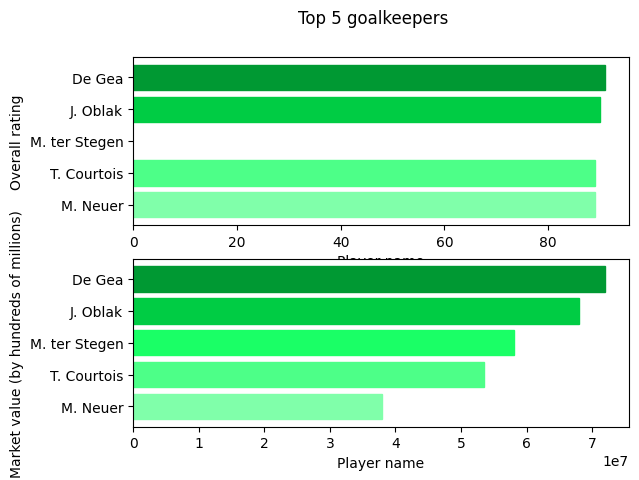

In [ ]:
graph_top_by_position("goalkeepers", 5)

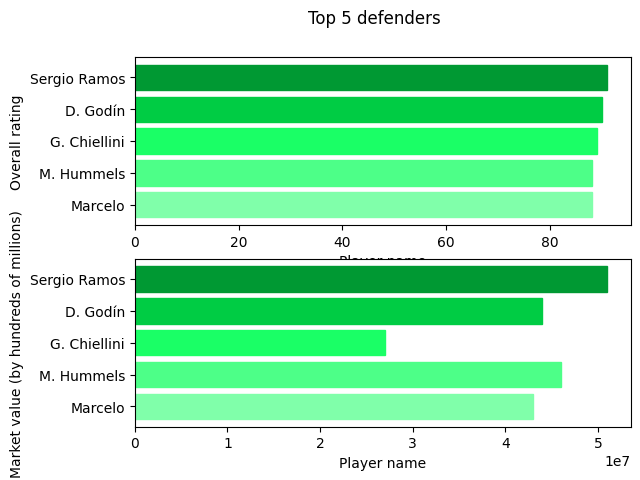

In [ ]:
graph_top_by_position("defenders",5)

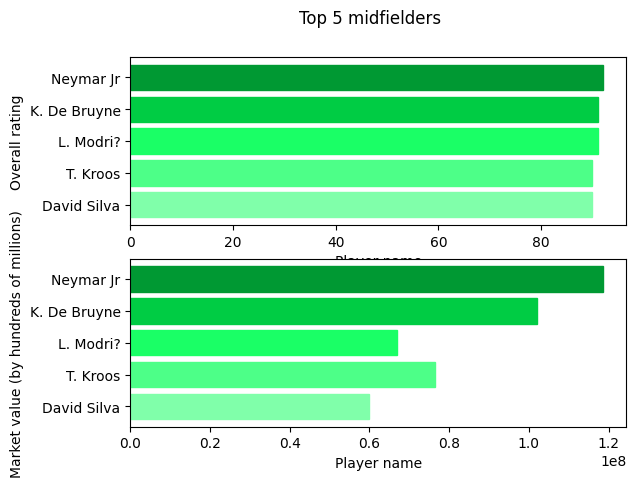

In [ ]:
graph_top_by_position("midfielders",5)

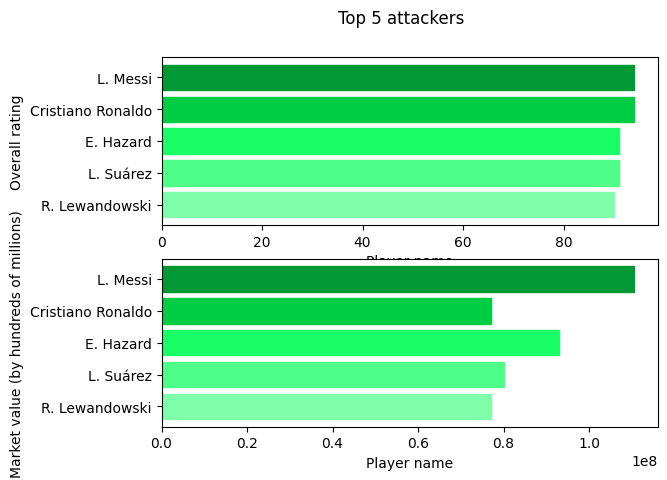

In [ ]:
graph_top_by_position("attackers",5)

#### 4.2. ¿Qué equipos tuvieron las mejores calificaciones generales promedio?

In [ ]:
#ingrese su código aquí

#### 4.3. ¿Cuáles fueron los equipos más caros?

In [ ]:
#ingrese su código aquí

#### 4.4. ¿Qué equipos tenían los valores de cláusula de rescisión más caros?

In [ ]:
#ingrese su código aquí

#### 4.5 ¿Cuál es la relación entre el valor de mercado, la edad, el salario y las calificaciones de los jugadores?

In [ ]:
#ingrese su código aquí

#### 4.6 ¿Qué selecciones nacionales tenían los jugadores más caros?

In [ ]:
#ingrese su código aquí

#### 4.7 ¿Qué selecciones nacionales tenían los mejores jugadores?

In [ ]:
#ingrese su código aquí

#### 4.9 ¿Cuáles son los principales atributos de los 20 mejores jugadores?

In [ ]:
#ingrese su código aquí